In [1]:
# 2(a)
# Diferetemente dos exemplos apresentados em sala de aula, onde as distancias entre os pontos, na reta de x,
# eram constantes, na questão podemos observar que os "n"'s dos pontos não possuem uma distancia constante.
# Precisamos, então, de uma função para trabalhar esse caso.
function FogueteEndevor(pares) # Recebe pontos(x, y) para calcular a integral
    soma = 0
    for i = 1:length(pares) - 1
        # area_trapezio = (base_menor + base_maior)*altura/2
        # base_menor = f(x_n) 
        # base_maior = f(x_(n+1))
        # altura = x_(n+1) - x_n
        soma += (pares[i][2] + pares[i+1][2])*(pares[i+1][1] - pares[i][1])/2
    end
    return soma #Retorna a soma de todas as areas dos trapezios 
end

FogueteEndevor (generic function with 1 method)

In [2]:
pares = [[0, 0], [10, 185], [15, 319], [20, 447], [32, 742], [59, 1325], [62, 1445], [125, 4151]]
FogueteEndevor(pares)

219567.5

In [ ]:
# A altura alcançada pelo foguete foi de 219567.5 pes

In [3]:
# (b)
# Para utilizar a formula do erro maximo precisariamos do valor de M
# Como M >= |f''(x)| para todo a<=x<=b
# Precisariamos de informações sobre f''(x)

In [4]:
#(c)
#Utilizaremos funções já feitas de outras listas
function vandermonde(x,y,grau)
    n,=size(y)
    V=zeros(n,grau+1)
    for i=1:n #linhas
        for j=1:(grau+1)
            V[i,j]=x[i]^(j-1)
        end
    end
    return V
end

vandermonde (generic function with 1 method)

In [5]:
function regressão(x,y,grau)
    V=vandermonde(x,y,grau)
    c=V\y #mínimos quadrados
    return c
end

regressão (generic function with 1 method)

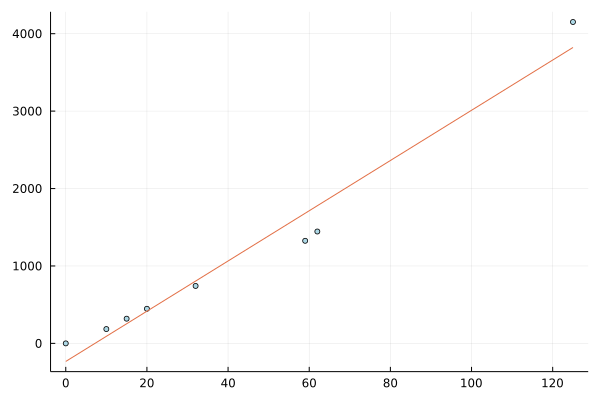

In [6]:
using Plots
using Random
using LinearAlgebra
B=[0;10;15;20;32;59;62;125]
A=[0;185;319;447;742;1325;1445;4151]
V=vandermonde(B,A,1)
C=regressão(B,A,1)
Reta(x)= C[1]+C[2]*x 
scatter(B, A, c=:lightblue, ms=3, leg=false)
plot!(Reta)

In [15]:
#Vamos calcular a altura calculando a integral da Reta o intervalo 0 a 125
trapezio(Reta,0,125,10)

224307.60859075945

In [ ]:
# A altura alcançada pelo foguete foi de 224307.60859075945 pes

In [9]:
#3(a)
function trapezio(f,a,b,n) #calcular a integral f(x) de a até b
    h=(b-a)/n
    S=0.0
    for i=1:(n-1)  #calcula o "meio"
        x=a+i*h
        S+=2*f(x)
    end
    S=h/2*(S+f(a)+f(b)) #calcula "as pontas"
    return S
end

trapezio (generic function with 1 method)

In [10]:
#Como h=0.1, a=0, b=1, então n = 10
f(x)=sqrt(1 - x^2) #x^2 + y^2 = 1
trapezio(f,0,1,10)

0.7761295815620796

In [11]:
# Como o raio é 1 e ja calculamos a area do circulo no primeiro quadrante(um quarto da area total do circulo)
# Para determinar um valor aproximado para pi basta multiplicar por 4 a area do primeiro quadrante
pi = 0.776*4

3.104

In [5]:
#Entao ́area limitada por este circulo no primeiro quadrante é 0.776
#E a aproximação de pi é 3.104

In [ ]:
#(b)
# Não temos  o valor de M. 
# M >= |f''(x)| para todo a<=x<=b
# f''(x) = - 1/((1-x^2)*sqrt(1-x^2)
# Para x = 0 temos f''= 1 e para x indo para 1 f'' tende ao infinito
# Então,não podemos aplicar a formula do erro do metode de trapezio

In [12]:
#4
#Aproveitando as funções apresentadas em sala de aula
function Integral(f,a,b)
    return trapezio(f,a,b,1000)
end

Integral (generic function with 1 method)

In [13]:
function Integral_Dupla(h,a,b,c,d) #integral dupla de h(x,y) de a(y) até b(y) no x e de c até d no y
    function g(y)
        f(x)=h(x,y)
        return Integral(f,a(y),b(y)) #mundando os limites da função
    end
    return Integral(g,c,d)
end

Integral_Dupla (generic function with 1 method)

In [14]:
h(x,y) = x^2*y
a(y) = y
b(y) = y^2
Integral_Dupla(h,a,b,5,6)

53397.912560154145